# Analysis of Batsmen at MAC, Chepauk against the home team Chennai Super Kings in the Powerplay, Middle and Death Overs

In [1]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')
matches = pd.read_csv('matches_updated_mens_ipl.csv')

In [3]:
df = deliveries.copy()
mdf = matches.copy()

In [4]:
df = df.rename(columns = {'matchId' : 'match_id'}) 
mdf = mdf.rename(columns = {'matchId' : 'match_id'})

In [5]:
req_df = pd.merge(df,mdf, on = 'match_id', how = 'left')

In [6]:
def phase(over):
    if over < 6:
        return 'Powerplay Overs'
    elif over < 17:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [7]:
def BPD(Balls, Dismissals):
    if Dismissals > 0:
        return Balls/Dismissals
    else :
        return Balls/1
    
def BPB(Balls, Boundaries):
    if Boundaries > 0:
        return Balls/Boundaries
    else:
        return Balls/1

In [8]:
def ByCustom(df,current_venue, current_phase, current_opposition):

    df = df[df.venue == current_venue]
    df = df[df.Phase == current_phase]
    df = df[df.bowling_team == current_opposition]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id' : 'Balls'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x : len(list(np.unique(x))))).reset_index().rename(columns = {'match_id' : 'Innings'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed' : 'Dismissals'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour' : 'Fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix' : 'Sixes'})
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot' : 'Dots'})
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls,on='batsman').merge(dismissals,on='batsman').merge(fours,on='batsman').merge(sixes,on='batsman').merge(dots, on='batsman')
    
    df['RPI'] = df.apply(lambda x : (x['Runs']/x['Innings']), axis = 1)
    df['SR'] = df.apply(lambda x : 100*(x['Runs']/x['Balls']), axis = 1)
    df['BPD'] = df.apply(lambda x : BPD(x['Balls'], x['Dismissals']),axis = 1)
    df['BPB'] = df.apply(lambda x : BPB(x['Balls'], (x['Fours'] + x['Sixes'])),axis = 1)
    df['Dot%'] = df.apply(lambda x : (x['Dots']/x['Balls']), axis = 1)
    
    return df

In [9]:
df1 = req_df[(req_df.venue == 'MA Chidambaram Stadium, Chepauk, Chennai') | (req_df.venue == 'MA Chidambaram Stadium') | (req_df.venue == 'MA Chidambaram Stadium, Chepauk')]

In [10]:
df1['venue'] = df1['venue'].replace(['MA Chidambaram Stadium',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'MA Chidambaram Stadium, Chepauk'], 'MAC Chepauk')

In [11]:
df1['Phase'] = df1['over'].apply(lambda x : phase(x))

In [12]:
df1.head()

,match_id,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,Phase
14815,1136565,1,0.1,0,1,Kolkata Knight Riders,Chennai Super Kings,CA Lynn,SP Narine,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2018-04-10,male,UV Gandhe,Kolkata Knight Riders,Chennai Super Kings,CB Gaffaney,RB Richardson,2018,Chennai Super Kings,NaN,6,SW Billings,NaN,NaN,MAC Chepauk,NaN,field,Chennai,A Nand Kishore,NaN,Chennai Super Kings,AK Chaudhary,5.0,NaN,5.0,Powerplay Overs
14816,1136565,1,0.2,0,2,Kolkata Knight Riders,Chennai Super Kings,CA Lynn,SP Narine,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2018-04-10,male,UV Gandhe,Kolkata Knight Riders,Chennai Super Kings,CB Gaffaney,RB Richardson,2018,Chennai Super Kings,NaN,6,SW Billings,NaN,NaN,MAC Chepauk,NaN,field,Chennai,A Nand Kishore,NaN,Chennai Super Kings,AK Chaudhary,5.0,NaN,5.0,Powerplay Overs
14817,1136565,1,0.3,0,3,Kolkata Knight Riders,Chennai Super Kings,CA Lynn,SP Narine,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2018-04-10,male,UV Gandhe,Kolkata Knight Riders,Chennai Super Kings,CB Gaffaney,RB Richardson,2018,Chennai Super Kings,NaN,6,SW Billings,NaN,NaN,MAC Chepauk,NaN,field,Chennai,A Nand Kishore,NaN,Chennai Super Kings,AK Chaudhary,5.0,NaN,5.0,Powerplay Overs
14818,1136565,1,0.4,0,4,Kolkata Knight Riders,Chennai Super Kings,SP Narine,CA Lynn,DL Chahar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2018-04-10,male,UV Gandhe,Kolkata Knight Riders,Chennai Super Kings,CB Gaffaney,RB Richardson,2018,Chennai Super Kings,NaN,6,SW Billings,NaN,NaN,MAC Chepauk,NaN,field,Chennai,A Nand Kishore,NaN,Chennai Super Kings,AK Chaudhary,5.0,NaN,5.0,Powerplay Overs
14819,1136565,1,0.5,0,5,Kolkata Knight Riders,Chennai Super Kings,SP Narine,CA Lynn,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2018-04-10,male,UV Gandhe,Kolkata Knight Riders,Chennai Super Kings,CB Gaffaney,RB Richardson,2018,Chennai Super Kings,NaN,6,SW Billings,NaN,NaN,MAC Chepauk,NaN,field,Chennai,A Nand Kishore,NaN,Chennai Super Kings,AK Chaudhary,5.0,NaN,5.0,Powerplay Overs


# Powerplay Overs

In [13]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45

In [14]:
df2 = ByCustom(df1,'MAC Chepauk', 'Powerplay Overs', 'Chennai Super Kings')

df2 = df2[(df2.Innings >= 2) & (df2.Balls >= 12)]

### Normalizing

df2['calc_SR'] = df2['SR'].apply(lambda x: x*x) 
df2['calc_RPI'] = df2['RPI'].apply(lambda x: x*x) 
df2['calc_BPD'] = df2['BPD'].apply(lambda x: x*x) 
df2['calc_Dot%'] = df2['Dot%'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df2[['calc_SR','calc_RPI', 'calc_BPD', 'calc_Dot%']].sum(axis = 0))

df2['calc_SR'] = df2['calc_SR'].apply(lambda x: x/sq_sr) 
df2['calc_RPI'] = df2['calc_RPI'].apply(lambda x: x/sq_rpi) 
df2['calc_BPD'] = df2['calc_BPD'].apply(lambda x: x/sq_bpd) 
df2['calc_Dot%'] = df2['calc_Dot%'].apply(lambda x: x/sq_dot_percentage)

df2['calc_SR'] = df2['calc_SR'].apply(lambda x: x*wt_sr) 
df2['calc_RPI'] = df2['calc_RPI'].apply(lambda x: x*wt_rpi) 
df2['calc_BPD'] = df2['calc_BPD'].apply(lambda x: x*wt_bpd) 
df2['calc_Dot%'] = df2['calc_Dot%'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df2['calc_SR']), min(df2['calc_SR'])
best_rpi, worst_rpi = max(df2['calc_RPI']), min(df2['calc_RPI'])
best_bpd, worst_bpd = max(df2['calc_BPD']), min(df2['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df2['calc_Dot%']), max(df2['calc_Dot%'])

### Comparison

df2['dev_best_SR'] = df2['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
df2['dev_best_RPI'] = df2['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
df2['dev_best_BPD'] = df2['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 
df2['dev_best_dot_percentage'] = df2['calc_Dot%'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df2['dev_best_sqrt'] = df2.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1) 

df2['dev_worst_SR'] = df2['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
df2['dev_worst_RPI'] = df2['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
df2['dev_worst_BPD'] = df2['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 
df2['dev_worst_dot_percentage'] = df2['calc_Dot%'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df2['dev_worst_sqrt'] = df2.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1) 

df2['Score'] = df2.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

PP_df = df2[[ 'batsman','Innings', 'Runs', 'Balls', 'Dismissals', 'Dot%', 'Score']].sort_values(['Score'], ascending = False).reset_index(drop = True)

In [15]:
PP_df.sort_values(by = 'Runs', ascending = False).reset_index(inplace = True, drop = True)

# Visualization

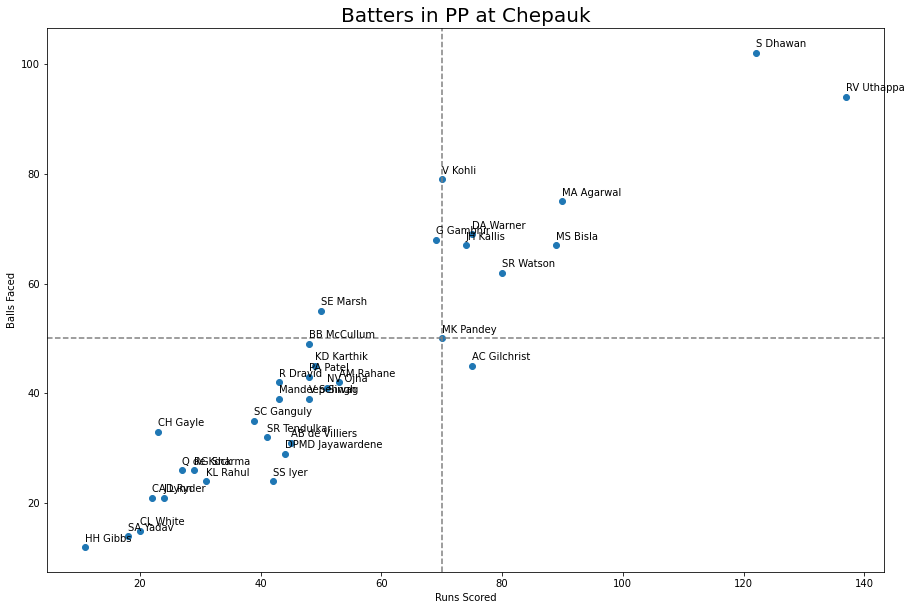

In [16]:
plt.figure(figsize = (15,10))

plt.scatter(PP_df['Runs'], PP_df['Balls'])

for i in range(len(PP_df)):
     plt.text(PP_df['Runs'][i], PP_df['Balls'][i] + 1, PP_df['batsman'][i])

plt.axvline(70, ls = '--', color = 'grey')
plt.axhline(50, ls = '--', color = 'grey')
plt.title('Batters in PP at Chepauk', fontsize = 20)
plt.xlabel('Runs Scored')
plt.ylabel('Balls Faced')
plt.savefig('Batters in Powerplay Overs at Chepauk.jpg')        
plt.show()

# Middle Overs

In [17]:
df3 = ByCustom(df1,'MAC Chepauk', 'Middle Overs', 'Chennai Super Kings')

df3 = df3[(df3.Innings >= 2) & (df3.Balls >= 24) ]

### Normalizing the Values

df3['calc_SR'] = df3['SR'].apply(lambda x: x*x) 
df3['calc_RPI'] = df3['RPI'].apply(lambda x: x*x) 
df3['calc_BPD'] = df3['BPD'].apply(lambda x: x*x) 
df3['calc_Dot%'] = df3['Dot%'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df3[['calc_SR','calc_RPI', 'calc_BPD', 'calc_Dot%']].sum(axis = 0))

df3['calc_SR'] = df3['calc_SR'].apply(lambda x: x/sq_sr) 
df3['calc_RPI'] = df3['calc_RPI'].apply(lambda x: x/sq_rpi) 
df3['calc_BPD'] = df3['calc_BPD'].apply(lambda x: x/sq_bpd) 
df3['calc_Dot%'] = df3['calc_Dot%'].apply(lambda x: x/sq_dot_percentage)

df3['calc_SR'] = df3['calc_SR'].apply(lambda x: x*wt_sr) 
df3['calc_RPI'] = df3['calc_RPI'].apply(lambda x: x*wt_rpi) 
df3['calc_BPD'] = df3['calc_BPD'].apply(lambda x: x*wt_bpd) 
df3['calc_Dot%'] = df3['calc_Dot%'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df3['calc_SR']), min(df3['calc_SR'])
best_rpi, worst_rpi = max(df3['calc_RPI']), min(df3['calc_RPI'])
best_bpd, worst_bpd = max(df3['calc_BPD']), min(df3['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df3['calc_Dot%']), max(df3['calc_Dot%'])

### Comparison

df3['dev_best_SR'] = df3['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
df3['dev_best_RPI'] = df3['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
df3['dev_best_BPD'] = df3['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 
df3['dev_best_dot_percentage'] = df3['calc_Dot%'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df3['dev_best_sqrt'] = df3.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1) 

df3['dev_worst_SR'] = df3['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
df3['dev_worst_RPI'] = df3['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
df3['dev_worst_BPD'] = df3['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 
df3['dev_worst_dot_percentage'] = df3['calc_Dot%'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df3['dev_worst_sqrt'] = df3.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1) 

df3['Score'] = df3.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

middle_df = df3[[ 'batsman','Innings', 'Runs', 'Balls', 'Dismissals', 'Dot%', 'Score']].sort_values(['Score'], ascending = False).reset_index(drop = True)

In [18]:
middle_df.reset_index(inplace=True, drop = True)

# Visualization

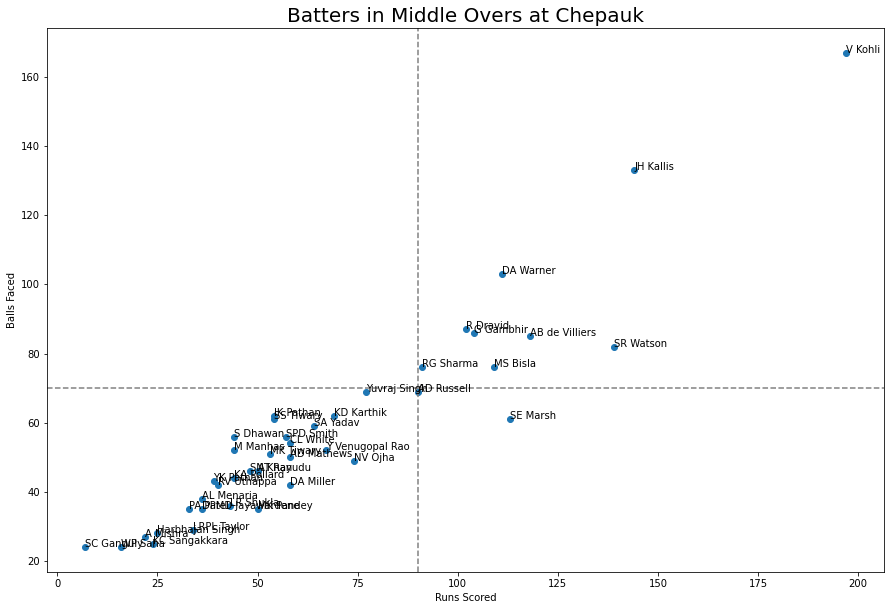

In [19]:
plt.figure(figsize = (15,10))

plt.scatter(middle_df['Runs'], middle_df['Balls'])

for i in range(len(middle_df)):
     plt.text(middle_df['Runs'][i], middle_df['Balls'][i], middle_df['batsman'][i])

plt.axvline(90, ls = '--', color = 'grey')
plt.axhline(70, ls = '--', color = 'grey')
plt.title('Batters in Middle Overs at Chepauk', fontsize = 20)
plt.xlabel('Runs Scored')
plt.ylabel('Balls Faced')
plt.savefig('Batters in Middle Overs at Chepauk.jpg')
plt.show()

# Death Overs

In [20]:
df4 = ByCustom(df1,'MAC Chepauk', 'Death Overs', 'Chennai Super Kings')

df4 = df4[(df4.Balls >= 9) & (df4.Innings >= 2)]

### Normalizing

df4['calc_SR'] = df4['SR'].apply(lambda x: x*x) 
df4['calc_RPI'] = df4['RPI'].apply(lambda x: x*x) 
df4['calc_BPD'] = df4['BPD'].apply(lambda x: x*x) 
df4['calc_Dot%'] = df4['Dot%'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df4[['calc_SR','calc_RPI', 'calc_BPD', 'calc_Dot%']].sum(axis = 0))

df4['calc_SR'] = df4['calc_SR'].apply(lambda x: x/sq_sr) 
df4['calc_RPI'] = df4['calc_RPI'].apply(lambda x: x/sq_rpi) 
df4['calc_BPD'] = df4['calc_BPD'].apply(lambda x: x/sq_bpd) 
df4['calc_Dot%'] = df4['calc_Dot%'].apply(lambda x: x/sq_dot_percentage)

df4['calc_SR'] = df4['calc_SR'].apply(lambda x: x*wt_sr) 
df4['calc_RPI'] = df4['calc_RPI'].apply(lambda x: x*wt_rpi) 
df4['calc_BPD'] = df4['calc_BPD'].apply(lambda x: x*wt_bpd) 
df4['calc_Dot%'] = df4['calc_Dot%'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df4['calc_SR']), min(df4['calc_SR'])
best_rpi, worst_rpi = max(df4['calc_RPI']), min(df4['calc_RPI'])
best_bpd, worst_bpd = max(df4['calc_BPD']), min(df4['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df4['calc_Dot%']), max(df4['calc_Dot%'])

### Comparison

df4['dev_best_SR'] = df4['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
df4['dev_best_RPI'] = df4['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
df4['dev_best_BPD'] = df4['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 
df4['dev_best_dot_percentage'] = df4['calc_Dot%'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df4['dev_best_sqrt'] = df4.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1) 

df4['dev_worst_SR'] = df4['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
df4['dev_worst_RPI'] = df4['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
df4['dev_worst_BPD'] = df4['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 
df4['dev_worst_dot_percentage'] = df4['calc_Dot%'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df4['dev_worst_sqrt'] = df4.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1) 

df4['Score'] = df4.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

death_df = df4[[ 'batsman','Innings', 'Runs', 'Balls', 'Dismissals', 'Dot%', 'Score']].sort_values(['Score'], ascending = False).reset_index(drop = True)

In [21]:
death_df.reset_index(inplace = True, drop = True)

# Visualization

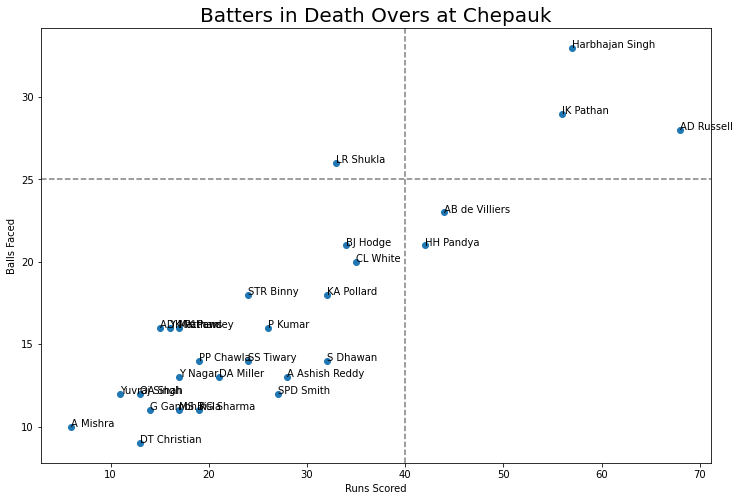

In [22]:
plt.figure(figsize = (12,8))

plt.scatter(death_df['Runs'], death_df['Balls'])

for i in range(len(death_df)):
     plt.text(death_df['Runs'][i], death_df['Balls'][i], death_df['batsman'][i])

plt.axvline(40, ls = '--', color = 'grey')
plt.axhline(25, ls = '--', color = 'grey')
plt.title('Batters in Death Overs at Chepauk', fontsize = 20)
plt.xlabel('Runs Scored')
plt.ylabel('Balls Faced')
plt.savefig('Batters in Death Overs at Chepauk.jpg')

plt.show()

In [23]:
PP_df.head(10).sort_values(by = 'Runs', ascending = False)

,batsman,Innings,Runs,Balls,Dismissals,Dot%,Score
6,RV Uthappa,8,137,94,4,0.489362,0.285807
1,MS Bisla,3,89,67,0,0.477612,0.763694
2,SR Watson,3,80,62,0,0.419355,0.634571
0,AC Gilchrist,2,75,45,1,0.466667,0.889036
4,JH Kallis,5,74,67,1,0.447761,0.409816
8,MK Pandey,5,70,50,2,0.520000,0.222809
9,SE Marsh,4,50,55,1,0.490909,0.179232
7,AB de Villiers,4,45,31,1,0.419355,0.268910
5,DPMD Jayawardene,3,44,29,2,0.379310,0.296462
3,SS Iyer,2,42,24,1,0.208333,0.559962


In [24]:
middle_df.head(10).sort_values(by = 'Runs', ascending = False)

,batsman,Innings,Runs,Balls,Dismissals,Dot%,Score
1,SR Watson,4,139,82,3,0.268293,0.769718
5,AB de Villiers,6,118,85,2,0.294118,0.443714
0,SE Marsh,3,113,61,1,0.196721,0.989389
3,MS Bisla,4,109,76,2,0.302632,0.535841
2,AD Russell,4,90,69,1,0.391304,0.609485
4,NV Ojha,3,74,49,2,0.326531,0.518707
6,SA Yadav,2,64,59,1,0.372881,0.443635
7,AD Mathews,2,58,50,0,0.300000,0.381303
9,DA Miller,3,58,42,2,0.261905,0.342149
8,MK Pandey,3,50,35,2,0.200000,0.364589


In [25]:
death_df.head(10).sort_values(by = 'Runs', ascending = False)

,batsman,Innings,Runs,Balls,Dismissals,Dot%,Score
0,AD Russell,2,68,28,0,0.357143,0.999994
8,Harbhajan Singh,3,57,33,2,0.424242,0.368390
5,IK Pathan,4,56,29,2,0.206897,0.493548
6,AB de Villiers,4,44,23,3,0.260870,0.443412
4,HH Pandya,3,42,21,0,0.238095,0.571160
9,CL White,3,35,20,2,0.300000,0.311082
1,S Dhawan,2,32,14,0,0.214286,0.775940
7,KA Pollard,2,32,18,0,0.333333,0.382073
3,A Ashish Reddy,2,28,13,1,0.230769,0.674625
2,SPD Smith,2,27,12,1,0.166667,0.728199


In [26]:
len(PP_df), len(middle_df), len(death_df)

(34, 41, 28)

In [27]:
PP_df.to_csv('PP.csv')

In [28]:
middle_df.to_csv('Middle.csv')
death_df.to_csv('Death.csv')

# Conclusion

### As a cricket fan, everyone knows that it is not easy to bat on the Chepauk wicket as like you bat on a Chinnaswamy or a Eden Gardens. There are players who are good at both PP and middle overs like Shane Watson, Manvinder Bisla, AB de Villiers and Manish Pandey. It can easily be seen that when it comes to batting in Chepauk against CSK, Shane Watson and Manvinder Bisla are the go-to batters who have been prolific over the years for their respective franchises. 

### When it comes to striking hard in the death overs which is a tough one at Chennai, the big beast Jamaican Andre Russell has been striking hard and undoubtedly he takes the number 1 position when it comes to toiling the bowlers at the death overs. There are other playhers like Hardik Pandya, AB de Villiers and Shikhar Dhawan too who have a lesser dot ball % and are striking almost close to 200 SR.